# Building a spaCy Processing Pipeline



In [1]:
import pandas as pd
import spacy

nlp = spacy.load("en_core_web_sm") # Load the English model

C:\Users\Electrova\AppData\Local\Temp\ipykernel_20196\186605067.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
file_path = 'sentiment_examples.txt'
with open(file_path, 'r', encoding='utf-8') as file:
    sentiment_texts = file.readlines()

In [3]:
# Initialize empty lists to store the results
token_lists = []  # List to store tokens for each sentiment example
filtered_token_lists = []  # List to store filtered tokens (after stop word removal) for each sentiment example
pos_tag_lists = []  # List to store POS tags for each sentiment example
ner_lists = []  # List to store named entities for each sentiment example

for sentiment_text in sentiment_texts:
    doc = nlp(sentiment_text.strip())  

    # Tokenization
    tokens = [token.text for token in doc]  
    token_lists.append(tokens)  

    # Stop Word Removal filter
    filtered_tokens = [token.text for token in doc if not token.is_stop]  
    filtered_token_lists.append(filtered_tokens)  


    # Part-of-Speech Tagging (POS tagging)
    pos_tags = [(token.text, token.pos_) for token in doc]  
    pos_tag_lists.append(pos_tags)  

    # Named Entity Recognition (NER)
    ner_entities = [(ent.text, ent.label_) for ent in doc.ents]  
    ner_lists.append(ner_entities)  

# Create a DataFrame to organize the results
results_df = pd.DataFrame({
    'Sentiment Example': sentiment_texts,
    'Tokens': token_lists,
    'Filtered Tokens': filtered_token_lists,
    'POS Tags': pos_tag_lists,
    'Named Entities': ner_lists
})

print(results_df)


                                   Sentiment Example  \
0  "I love the new features of your product! It h...   
1  "The customer support was exceptional in New Y...   
2  "The quality of your service exceeded my expec...   
3  "I'm extremely satisfied with my purchase. The...   
4  "The user interface is intuitive and easy to n...   
5  "I had a positive experience shopping on your ...   
6  "Your company values customer feedback, and it...   
7  "The pricing is fair, and the value I get in r...   
8  "I appreciate the personalized recommendations...   
9  "The delivery was prompt, and the packaging wa...   

                                              Tokens  \
0  [", I, love, the, new, features, of, your, pro...   
1  [", The, customer, support, was, exceptional, ...   
2  [", The, quality, of, your, service, exceeded,...   
3  [", I, 'm, extremely, satisfied, with, my, pur...   
4  [", The, user, interface, is, intuitive, and, ...   
5  [", I, had, a, positive, experience, shoppin

In [4]:

results_df.to_csv('processed_data.csv', index=False)

# Read the CSV file 'processed_data.csv' into a Pandas DataFrame called processed_df
# Specify the encoding as 'latin-1' to handle special characters if present
processed_df = pd.read_csv('processed_data.csv', encoding='latin-1')


In [5]:
processed_df.head(3)

,Sentiment Example,Tokens,Filtered Tokens,POS Tags,Named Entities
0,"""I love the new features of your product! It h...","['""', 'I', 'love', 'the', 'new', 'features', '...","['""', 'love', 'new', 'features', 'product', '!...","[('""', 'PUNCT'), ('I', 'PRON'), ('love', 'VERB...",[]
1,"""The customer support was exceptional in New Y...","['""', 'The', 'customer', 'support', 'was', 'ex...","['""', 'customer', 'support', 'exceptional', 'N...","[('""', 'PUNCT'), ('The', 'DET'), ('customer', ...","[('New York', 'GPE')]"
2,"""The quality of your service exceeded my expec...","['""', 'The', 'quality', 'of', 'your', 'service...","['""', 'quality', 'service', 'exceeded', 'expec...","[('""', 'PUNCT'), ('The', 'DET'), ('quality', '...","[('Prague', 'GPE')]"


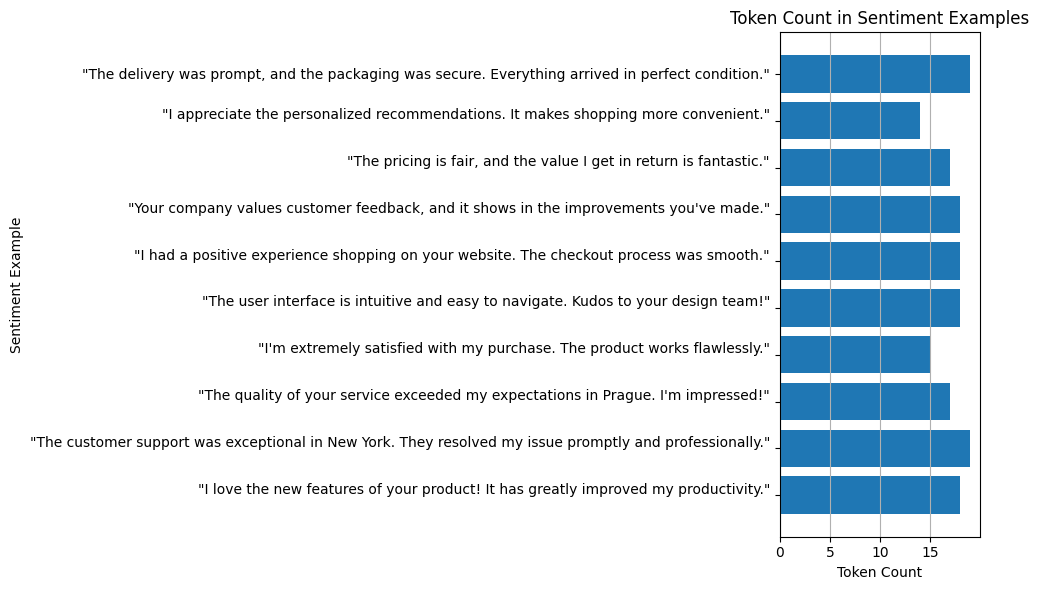

In [6]:
import matplotlib.pyplot as plt

# Load the processed data from the CSV file
file_path = 'processed_data.csv'  # Update with the path to your processed data CSV file
processed_data = pd.read_csv(file_path)

# Calculate the count of tokens for each sentiment example
token_counts = processed_data['Tokens'].apply(lambda x: len(x.split()))

# Create a bar chart
plt.figure(figsize=(10, 6))  # Set the figure size
plt.barh(processed_data['Sentiment Example'], token_counts)  # Horizontal bar chart
plt.xlabel('Token Count')  # X-axis label
plt.ylabel('Sentiment Example')  # Y-axis label
plt.title('Token Count in Sentiment Examples')  # Chart title
plt.grid(axis='x')  # Show grid lines on the x-axis
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()